In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy as db
import mysql.connector

In [2]:
con = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    password = 'Welldone1+',
    database = 'world'
)
print(con)

In [3]:
c = con.cursor(buffered=True)
c

## 2. Data Visualization Test (60)

### Jawaban No. 2.1

In [4]:
pd.read_sql('show tables', con)

,Tables_in_world
0,city
1,country
2,countrylanguage


In [5]:
df_country = pd.read_sql('select * from country', con)
df_country.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL


In [6]:
df_city = pd.read_sql('select * from city', con)
df_city.head()

,ID,Name,CountryCode,District,Population
0,1,Kabul,AFG,Kabol,1780000
1,2,Qandahar,AFG,Qandahar,237500
2,3,Herat,AFG,Herat,186800
3,4,Mazar-e-Sharif,AFG,Balkh,127800
4,5,Amsterdam,NLD,Noord-Holland,731200


In [7]:
df_cl = pd.read_sql('select * from countrylanguage', con)
df_cl.head()

,CountryCode,Language,IsOfficial,Percentage
0,ABW,Dutch,T,5.3
1,ABW,English,F,9.5
2,ABW,Papiamento,F,76.7
3,ABW,Spanish,F,7.4
4,AFG,Balochi,F,0.9


In [8]:
df_21a = df_country.dropna().sort_values('Population', ascending=True).head(10)
df_21 = df_21a[['Name', 'Continent', 'Region', 'IndepYear', 'Population']]
df_21

,Name,Continent,Region,IndepYear,Population
123,Liechtenstein,Europe,Western Europe,1806.0,32300
13,Antigua and Barbuda,North America,Caribbean,1981.0,68000
58,Dominica,North America,Caribbean,1978.0,71000
202,Seychelles,Africa,Eastern Africa,1976.0,77000
212,Tonga,Oceania,Polynesia,1970.0,99000
233,Samoa,Oceania,Polynesia,1962.0,180000
231,Vanuatu,Oceania,Melanesia,1980.0,190000
27,Belize,North America,Central America,1981.0,241000
31,Barbados,North America,Caribbean,1966.0,270000
104,Iceland,Europe,Nordic Countries,1944.0,279000


In [9]:
df_22z = df_city.groupby('CountryCode').mean()
df_22z.drop('ID', axis=1, inplace=True)
df_22 = df_22z.sort_values('Population', ascending=False).head(10)
df_22.rename({'Population': 'mean'}, axis=1, inplace=True)
df_22

,mean
CountryCode,
SGP,4017733.0
HKG,1650316.5
URY,1236000.0
GIN,1090610.0
UGA,890800.0
SLE,850000.0
LBR,850000.0
MLI,809552.0
AUS,808119.0


In [28]:
by_language = df_cl.groupby('Language')
df_23 = pd.DataFrame(by_language.count()['CountryCode'].sort_values(ascending=False)).head(10)
df_23.rename({'CountryCode': 'count'}, axis=1, inplace=True)
df_23

,count
Language,
English,60
Arabic,33
Spanish,28
French,25
German,19
Chinese,19
Russian,17
Italian,15
Creole English,14


### Jawaban No. 2.2

In [11]:
df_pb = df_country[['Continent', 'Population']].groupby('Continent').sum().reset_index()
df_pb

,Continent,Population
0,Africa,784475000
1,Antarctica,0
2,Asia,3705025700
3,Europe,730074600
4,North America,482993000
5,Oceania,30401150
6,South America,345780000


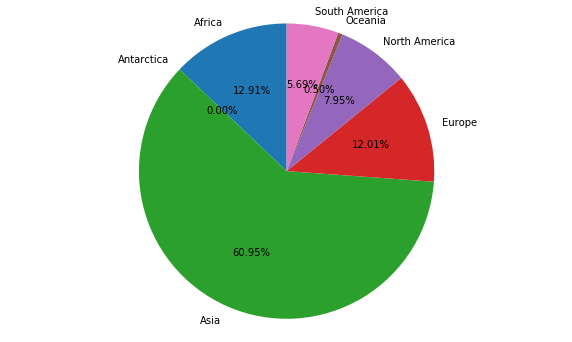

Benua Asia yang menjadi penyumbang populasi terbanyak
Persentase populasi manusia yang berada di benua Amerika Utara adalah 7.95%


In [12]:
plt.figure(figsize=(10,6))
plt.pie(df_pb['Population'],
       labels=df_pb['Continent'].tolist(),
       autopct = '%.2f%%',
        startangle=90
       )

plt.axis('equal')
plt.show()
print('Benua Asia yang menjadi penyumbang populasi terbanyak')
print('Persentase populasi manusia yang berada di benua Amerika Utara adalah 7.95%')

### Jawaban No. 2.3

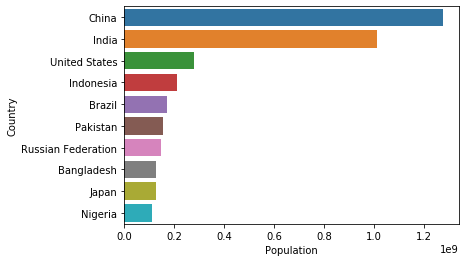

China adalah negara dengan populasi terbanyak
Negara Nigeria yang menjadi urutan ke 10 berdasarkan horizontal barplot
Populasi negara yang berada di urutan ke-3 adalah 278357000


In [13]:
sns.barplot(x='Population', y='Name', data=df_country.sort_values('Population', ascending=False).head(10))
plt.ylabel('Country')
plt.show()
print('China adalah negara dengan populasi terbanyak')
print('Negara Nigeria yang menjadi urutan ke 10 berdasarkan horizontal barplot')
populasi_us = df_country[df_country['Name'] == 'United States']['Population'].values[0]
print(f'Populasi negara yang berada di urutan ke-3 adalah {populasi_us}')

### Jawaban No. 2.4

In [14]:
df_asia = df_country[df_country['Continent']=='Asia']
df_asia['LifeExpectancy'].describe()

count    51.000000
mean     67.441176
std       8.396527
min      45.900000
25%      62.700000
50%      68.500000
75%      72.700000
max      81.600000
Name: LifeExpectancy, dtype: float64

In [15]:
iqr = df_asia['LifeExpectancy'].quantile(0.75) - df_asia['LifeExpectancy'].quantile(0.25)
lower = df_asia['LifeExpectancy'].quantile(0.25) - (1.5*iqr)
upper = df_asia['LifeExpectancy'].quantile(0.75) + (1.5*iqr)
mean = df_asia['LifeExpectancy'].mean()
median = df_asia['LifeExpectancy'].median()
std = df_asia['LifeExpectancy'].std()
q1 = df_asia['LifeExpectancy'].quantile(0.75)
q2 = df_asia['LifeExpectancy'].quantile(0.50)
q3 = df_asia['LifeExpectancy'].quantile(0.25)

print(f'IQR dari Angka Harapan Hidup (Life Expectancy) dari Benua Asia: {iqr}')
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Standard Deviation: {std}')
print(f'Upper Boundaries: {upper}')
print(f'Lower Boundaries: {lower}')

IQR dari Angka Harapan Hidup (Life Expectancy) dari Benua Asia: 10.0
Mean: 67.44117647058825
Median: 68.5
Standard Deviation: 8.39652729336571
Upper Boundaries: 87.7
Lower Boundaries: 47.7


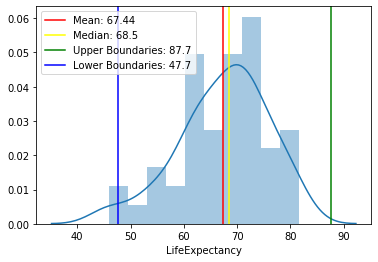

In [16]:
sns.distplot(df_asia['LifeExpectancy'], bins=10)
plt.axvline(df_asia['LifeExpectancy'].mean(), label=f'Mean: {round(mean,2)}', color='red')
plt.axvline(df_asia['LifeExpectancy'].median(), label=f'Median: {round(median,2)}', color='yellow')
plt.axvline(upper, label=f'Upper Boundaries: {round(upper,2)}', color='green')
plt.axvline(lower, label=f'Lower Boundaries: {round(lower,2)}', color='blue')
# plt.axvline(asia['LifeExpectancy'].quantile(.75), label=f'Q1: {round(q1,2)}', color='green')
# plt.axvline(asia['LifeExpectancy'].quantile(.25), label=f'Q1: {round(q3,2)}', color='green')

plt.legend()
plt.show()

### Apakah terdapat negara yang Angka Harapan Hidup-nya berada pada outliers?
### Ya, ada

In [17]:
df_out = df_asia[(df_asia['LifeExpectancy'] > upper) | (df_asia['LifeExpectancy'] < lower)]
df_out

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
211,TMP,East Timor,Asia,Southeast Asia,14874.0,NaN,885000,46.0,0.0,NaN,Timor Timur,Administrated by the UN,José Alexandre Gusmão,1522.0,TP


#### Berdasarkan Skewness Test yang sudah dilakukan, apakah data LifeExpectancy termasuk data normal atau skew?
#### Data LifeExpectancy termasuk data skew negatif karena distribusi data condong ke kanan

### Jawaban No. 2.5

In [18]:
def hitung(x):
    return x*1000000
df_country['GNP'] = df_country['GNP'].apply(hitung)
df_country

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,8.280000e+08,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5.976000e+09,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6.648000e+09,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,6.320000e+07,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3.205000e+09,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6.041000e+09,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YUG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,1.700000e+10,NaN,Jugoslavija,Federal Republic,Vojislav Koštunica,1792.0,YU
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,1.167290e+11,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3.377000e+09,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM


In [19]:
def gnppercapita(a,b):
    return a/b
df_country['GNPperCapita'] = gnppercapita(df_country['GNP'], df_country['Population'])
df_country

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPperCapita
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,8.280000e+08,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,8038.834951
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5.976000e+09,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,263.028169
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6.648000e+09,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO,516.229228
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,6.320000e+07,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,7900.000000
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3.205000e+09,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL,942.314477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6.041000e+09,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE,333.535777
235,YUG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,1.700000e+10,NaN,Jugoslavija,Federal Republic,Vojislav Koštunica,1792.0,YU,1597.744361
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,1.167290e+11,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA,2890.977537
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3.377000e+09,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM,368.306249


### Jawaban No. 2.6

In [20]:
iqr_l = df_country['LifeExpectancy'].quantile(0.75) - df_country['LifeExpectancy'].quantile(0.25)
lower_l = df_country['LifeExpectancy'].quantile(0.25) - (1.5*iqr)
upper_l = df_country['LifeExpectancy'].quantile(0.75) + (1.5*iqr)

In [21]:
iqr_g = df_country['GNPperCapita'].quantile(0.75) - df_country['GNPperCapita'].quantile(0.25)
lower_g = df_country['GNPperCapita'].quantile(0.25) - (1.5*iqr)
upper_g = df_country['GNPperCapita'].quantile(0.75) + (1.5*iqr)

In [22]:
df_country_6 = df_country[(df_country['LifeExpectancy'] <= upper_l) & (df_country['LifeExpectancy'] >= lower_l) & (df_country['GNPperCapita'] <= upper_g) & (df_country['GNPperCapita'] >= lower_g)]
df_country_6

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPperCapita
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3.205000e+09,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL,942.314477
9,ARM,Armenia,Asia,Middle East,29800.0,1991.0,3520000,66.4,1.813000e+09,1627.0,Hajastan,Republic,Robert Kotšarjan,126.0,AM,515.056818
10,ASM,American Samoa,Oceania,Polynesia,199.0,NaN,68000,75.1,3.340000e+08,NaN,Amerika Samoa,US Territory,George W. Bush,54.0,AS,4911.764706
16,AZE,Azerbaijan,Asia,Middle East,86600.0,1991.0,7734000,62.9,4.127000e+09,4100.0,Azärbaycan,Federal Republic,Heydär Äliyev,144.0,AZ,533.617792
19,BEN,Benin,Africa,Western Africa,112622.0,1960.0,6097000,50.2,2.357000e+09,2141.0,Bénin,Republic,Mathieu Kérékou,187.0,BJ,386.583566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,VEN,Venezuela,South America,South America,912050.0,1811.0,24170000,73.1,9.502300e+10,88434.0,Venezuela,Federal Republic,Hugo Chávez Frías,3539.0,VE,3931.443939
231,VUT,Vanuatu,Oceania,Melanesia,12189.0,1980.0,190000,60.6,2.610000e+08,246.0,Vanuatu,Republic,John Bani,3537.0,VU,1373.684211
233,WSM,Samoa,Oceania,Polynesia,2831.0,1962.0,180000,69.2,1.410000e+08,157.0,Samoa,Parlementary Monarchy,Malietoa Tanumafili II,3169.0,WS,783.333333
235,YUG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,1.700000e+10,NaN,Jugoslavija,Federal Republic,Vojislav Koštunica,1792.0,YU,1597.744361


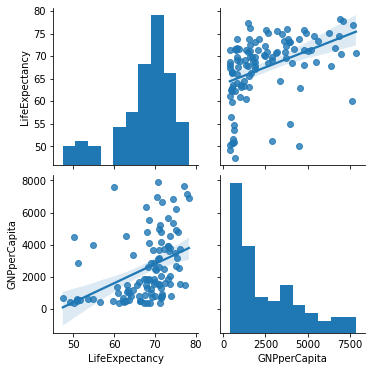

In [23]:
sns.pairplot(df_country_6[['LifeExpectancy','GNPperCapita']], kind='reg')
plt.show()

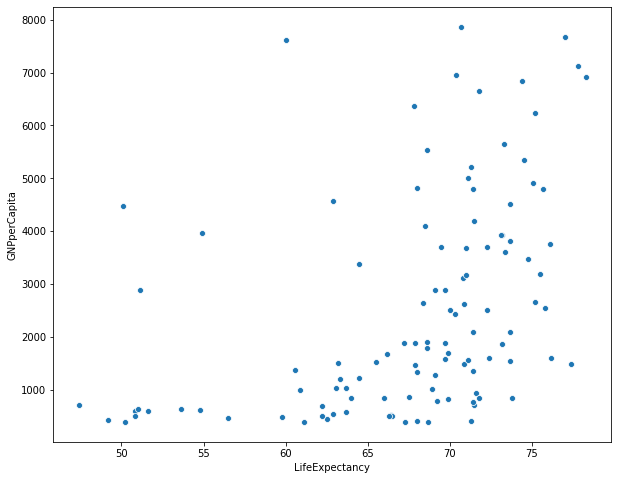

In [24]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='LifeExpectancy', y='GNPperCapita', data=df_country_6)
plt.show()

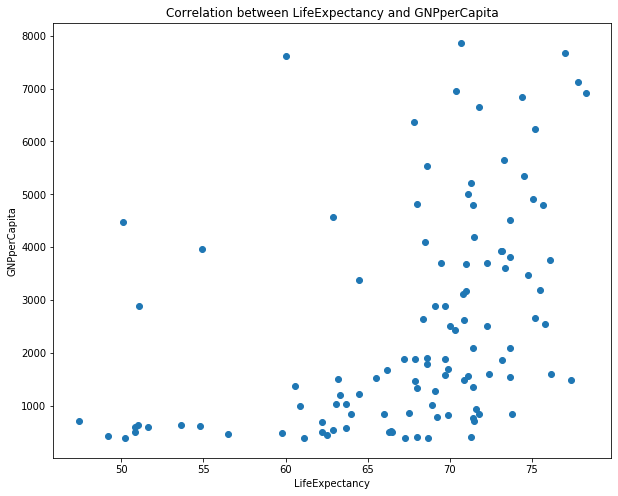

In [25]:
plt.figure(figsize=(10,8)) # figsize=(lebar,tinggi) dengan satuan inches

# plt.subplot(3,2,1)
plt.scatter(df_country_6['LifeExpectancy'], df_country_6['GNPperCapita'])
plt.title('Correlation between LifeExpectancy and GNPperCapita')
plt.xlabel('LifeExpectancy')
plt.ylabel('GNPperCapita')

plt.show()

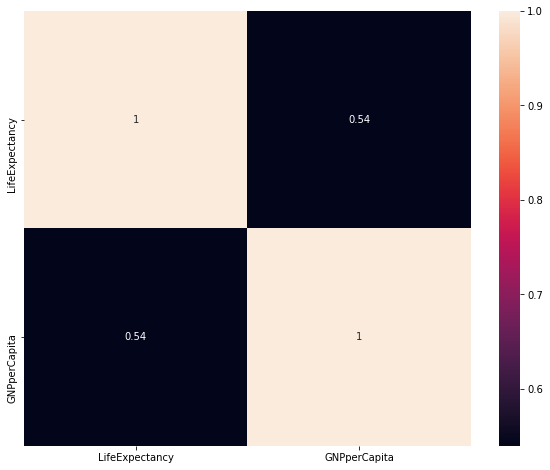

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df_country_6[['LifeExpectancy','GNPperCapita']].corr('spearman'), annot=True)
plt.show()

### Saya setuju bahwa negara-negara dengan LifeExpectancy yang tinggi akan selalu memiliki GNPperCapita yang tinggi pula. Dan ini berarti LifeExpectancy dan GNPperCapita memiliki korelasi positif yang signifikan.
#### Alasan: Beberapa plot diatas menggambarkan garis yang mengarah ke atas dan juga nilai korelasi berdasarkan Spearman positif, yaitu 0.54.

In [27]:
a = df_country.groupby('Continent')['GNPperCapita'].sum().sort_values(ascending=False)
df_gnppp = pd.DataFrame(a)
display(df_gnppp)
print(f'Benua Eropa adalah yang salah satu negaranya mencetak GNPperCapita tertinggi, jika dibandingkan dari benua-benua lainnya.')

,GNPperCapita
Continent,
Europe,620886.485885
North America,290303.652159
Asia,282200.402298
Oceania,103107.458298
Africa,71838.862205
South America,44470.167729
Antarctica,0.000000


Benua Eropa adalah yang salah satu negaranya mencetak GNPperCapita tertinggi, jika dibandingkan dari benua-benua lainnya.
